# OpenCV Basics

Before we jump into any advanced material, let's quickly recap the basics:

1. Reading an image
2. Writing an image
3. Corner Detection
4. Edge Detection
5. Color Transforms
6. Image Rotation

# Reading an Image
![Board](data/board.jpg)

In [37]:
# Import required modules
import cv2
from utils import imshow, imshow2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Use imread function to read image
img = cv2.imread("data/board.jpg")

# Writing an Image

In [17]:
# Use imwrite function to write image
cv2.imwrite("data/board_new.jpg",img)

True

In [18]:
# Check if file has been written to the location
!ls data/board*

data/board.jpg	data/board_new.jpg


# Harris Corner Detection
![Board with corners](data/board_corners.jpg)

OpenCV has the function **`cv2.cornerHarris()`** for detecting corners in an image. Its arguments are:

- **img** - Input image, it should be grayscale and float32 type.
- **blockSize** - It is the size of neighbourhood considered for corner detection
- **ksize** - Aperture parameter of Sobel derivative used.
- **k** - Harris detector free parameter in the equation.

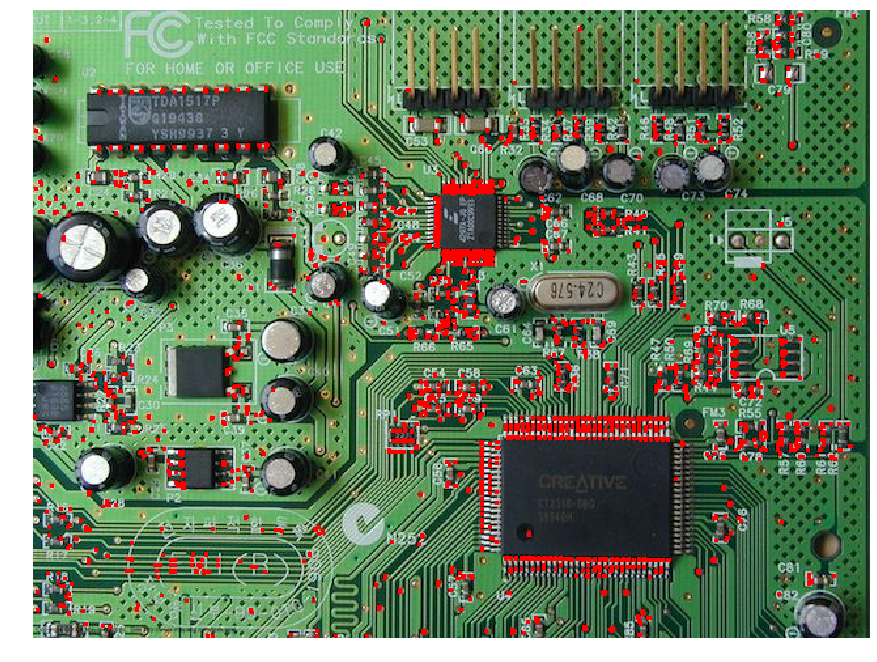

True

In [30]:
# Create a copy of image
img_copy = img.copy()

# Convert image to grayscale
gray = cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
# Detect corners in image
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners
dst = cv2.dilate(dst,None)

img_copy[dst>0.1*dst.max()]=[0,0,255]

imshow(img_copy)

# Save image
cv2.imwrite("data/board_corners.jpg",img_copy)

# Canny Edge Detection

The full sequence of Canny Edge Detection comprises of the following steps:

1. Grayscale Conversion
2. Gaussian Blur
3. Gradient Calculation
4. Non Maximum Suppression
5. Double Thresholding
6. Edge Tracking by Hysteresis

Luckily, OpenCV has its own function (**`cv2.Canny()`**) for Canny Edge Detection.

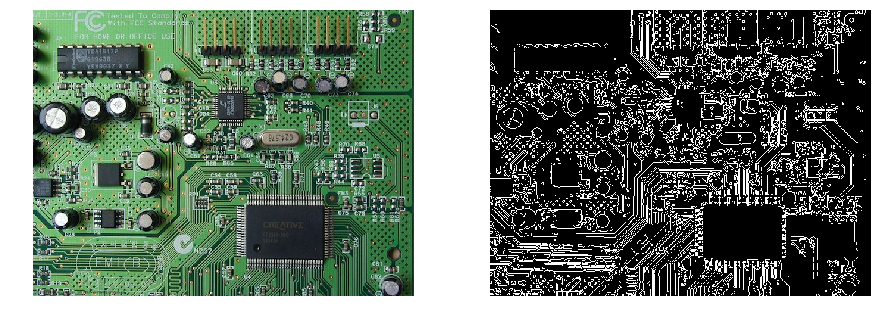

In [44]:
# Convert image to grayscale
gray = cv2.cvtColor(img_copy,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,200,600)

imshow2(img,edges)

# Color Transforms

We can use OpenCV's **`cv2.cvtColor()`** function to transform the color space of an image. Some of the important color spaces are:

1. RGB color space: Red, Green and Blue
2. HSV color space: Hue, Saturation and Value
3. Grayscale

Note that OpenCV uses **BGR** color space rather than **RGB**.

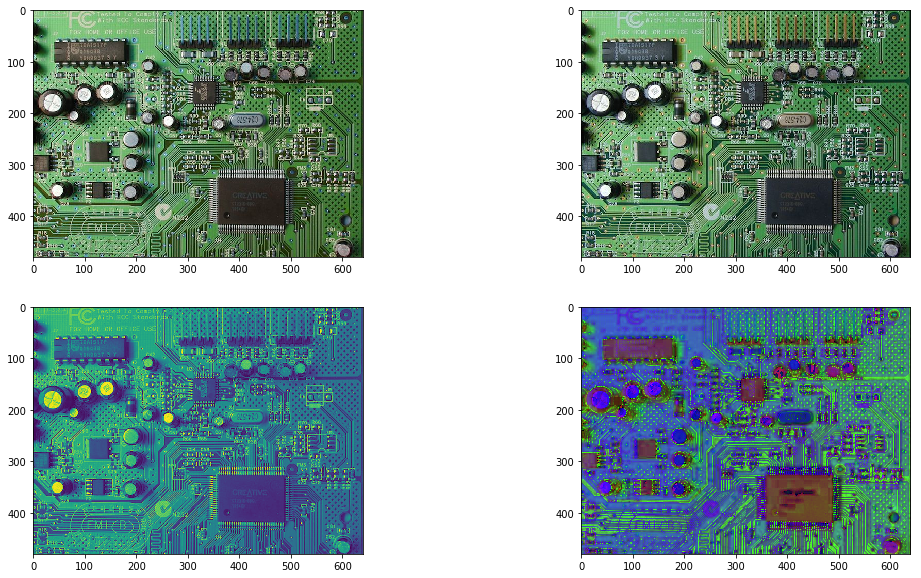

In [48]:
fig = plt.figure(figsize=(18,10))

# Original image
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)

# Convert image to RGB
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ax1 = fig.add_subplot(2,2,2)
ax1.imshow(rgb)

# Convert image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ax1 = fig.add_subplot(2,2,3)
ax1.imshow(gray)

# Convert image to HSV color space
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
ax1 = fig.add_subplot(2,2,4)
ax1.imshow(hsv)

plt.show()

# Image Rotation

Rotation is a simple Euclidean transform. In OpenCV, we can rotate images about any point ( let’s call it center ) and by an angle ( let’s simply call this angle ).

In OpenCV, a rotation is represented as a 2x3 Matrix because rotations belong to the special class of transforms called the Affine Transform which is covered in the next section.

The **getRotationMatrix2D** function is used to get the matrix which will define the rotation.

The parameters for the function is

**`rotMat = getRotationMatrix2D(center, angle, scale)`**

[[   0.8660254    -0.5         162.87187079]
 [   0.5           0.8660254  -127.84609691]]


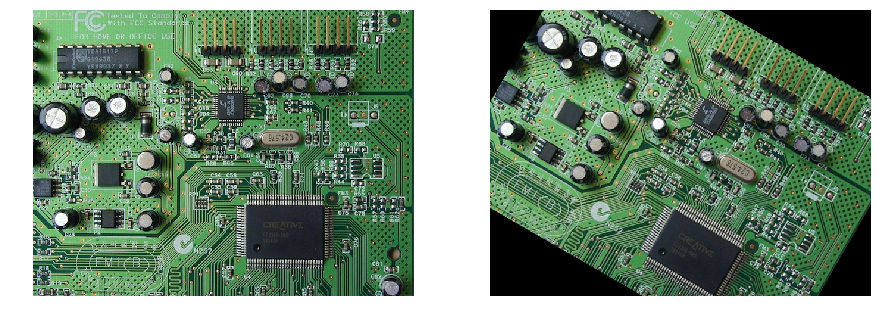

In [50]:
# Getting the dimesnions of the image
dim = img.shape

# Rotating the image by -30 degrees about the center
# dim[0] stores the no of rows and dim[1] no of columns
rotationAngle = -30
scaleFactor = 1

# Rotation matrix
rotationMatrix = cv2.getRotationMatrix2D((dim[1]/2, dim[0]/2), rotationAngle, scaleFactor)

print(rotationMatrix)

result = cv2.warpAffine(img, rotationMatrix, (dim[1],dim[0]))

imshow2(img,result)

# Thank You!